<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 14: **Análise de variância**
____

**One-way ANOVA**

In [2]:
# Exemplo
milho <- read.table("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/milho.txt", header = TRUE)
str(milho)

'data.frame':	20 obs. of  2 variables:
 $ variedade: Factor w/ 4 levels "A","B","C","D": 1 1 1 1 1 2 2 2 2 2 ...
 $ prod     : int  25 26 20 23 21 31 25 28 27 24 ...


In [3]:
# ajuste do modelo
lm.milho <- lm(prod ~ variedade, data = milho)
lm.milho


Call:
lm(formula = prod ~ variedade, data = milho)

Coefficients:
(Intercept)   variedadeB   variedadeC   variedadeD  
         23            4            3            8  


In [4]:
# modelo de médias (sem o intercepto)
lm(prod ~ -1 + variedade, data = milho)


Call:
lm(formula = prod ~ -1 + variedade, data = milho)

Coefficients:
variedadeA  variedadeB  variedadeC  variedadeD  
        23          27          26          31  


In [5]:
# tabela de ANOVA
anova(lm.milho)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
variedade,3,163.75,54.58333,7.797619,0.001975594
Residuals,16,112.00,7.00000,NA,NA


____
**Teste de homocedasticidade**

$H_0: \sigma_1^2 = \sigma_2^2 = ... = \sigma_I^2 = \sigma^2$

In [6]:
bartlett.test(residuals(lm.milho) ~ variedade, data = milho)


	Bartlett test of homogeneity of variances

data:  residuals(lm.milho) by variedade
Bartlett's K-squared = 0.03706, df = 3, p-value = 0.9981


___
**Two-way ANOVA**

In [7]:
# dados de exemplo: experimento em DBC
batata <- read.table(file = "https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/batata.txt", 
                     header = TRUE, colClasses = c("factor", "factor", "numeric"))
str(batata)

'data.frame':	12 obs. of  3 variables:
 $ cultivar: Factor w/ 4 levels "1","2","3","4": 1 1 1 2 2 2 3 3 3 4 ...
 $ bloco   : Factor w/ 3 levels "1","2","3": 1 2 3 1 2 3 1 2 3 1 ...
 $ prod    : num  50.9 50.6 51.2 49.1 49.3 49.9 49.9 49.8 49.5 49.2 ...


In [8]:
# ANOVA
lm.batata <- lm(prod ~ cultivar + bloco, data = batata)
anova(lm.batata)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cultivar,3,4.3825,1.4608333,13.80315,0.00421805
bloco,2,0.4650,0.2325000,2.19685,0.19237256
Residuals,6,0.6350,0.1058333,NA,NA


___
**O teste da aditividade**

In [9]:
lambda <- predict(lm.batata)^2                                  # efeito de interação cultivar x bloco
anova(lm(prod ~ cultivar + bloco + lambda, data = batata))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cultivar,3,4.382500000,1.460833333,11.63574969,0.01079993
bloco,2,0.465000000,0.232500000,1.85189627,0.25012303
lambda,1,0.007265057,0.007265057,0.05786724,0.81945134
Residuals,5,0.627734943,0.125546989,NA,NA


___
**Bootstrap na ANOVA**

*Exemplo 1: milho*

In [10]:
pred <- fitted(lm.milho)   # valores preditos
res <- residuals(lm.milho) # resíduos

In [11]:
nboot <- 1000  # n reamostragens

# matriz para rebeber as estimativas bootstrap
pars <- matrix(nrow = nboot, ncol = 4)
colnames(pars) <- names(coef(lm.milho))

# loop
for(i in 1:nboot) {
   obs <- pred + sample(res, replace = TRUE)
   pars[i, ] <- coef(lm(obs ~ variedade, data = milho))
}

# percentis 2.5 e 97.5
apply(pars, 2, quantile, p = c(0.025, 0.975))

,(Intercept),variedadeB,variedadeC,variedadeD
2.5%,21,0.8,-0.2,4.995
97.5%,25,6.8,5.8,11.000


In [12]:
# IC paramétrico
confint(lm.milho)

,2.5 %,97.5 %
(Intercept),20.49169,25.50831
variedadeB,0.45272,7.54728
variedadeC,-0.54728,6.54728
variedadeD,4.45272,11.54728


In [13]:
# comparação dos erros padrão das estimativas
summary(lm.milho)

# desvios padrao bootstrap
apply(pars, 2, sd)


Call:
lm(formula = prod ~ variedade, data = milho)

Residuals:
   Min     1Q Median     3Q    Max 
    -4     -2      0      2      4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.000      1.183  19.439 1.48e-12 ***
variedadeB     4.000      1.673   2.390 0.029473 *  
variedadeC     3.000      1.673   1.793 0.091923 .  
variedadeD     8.000      1.673   4.781 0.000204 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.646 on 16 degrees of freedom
Multiple R-squared:  0.5938,	Adjusted R-squared:  0.5177 
F-statistic: 7.798 on 3 and 16 DF,  p-value: 0.001976


(Intercept)  variedadeB  variedadeC  variedadeD 
   1.045320    1.439272    1.484503    1.485979

*Exemplo 2: dadosboot.txt*

In [14]:
dados <- read.table("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/dadosboot.txt", header = TRUE)
str(dados)

'data.frame':	16 obs. of  2 variables:
 $ trt: Factor w/ 4 levels "a","b","c","d": 1 2 3 4 1 2 3 4 1 2 ...
 $ y  : num  18.2 18.6 22.8 17.7 19.5 21.6 22 17 22.2 23.1 ...


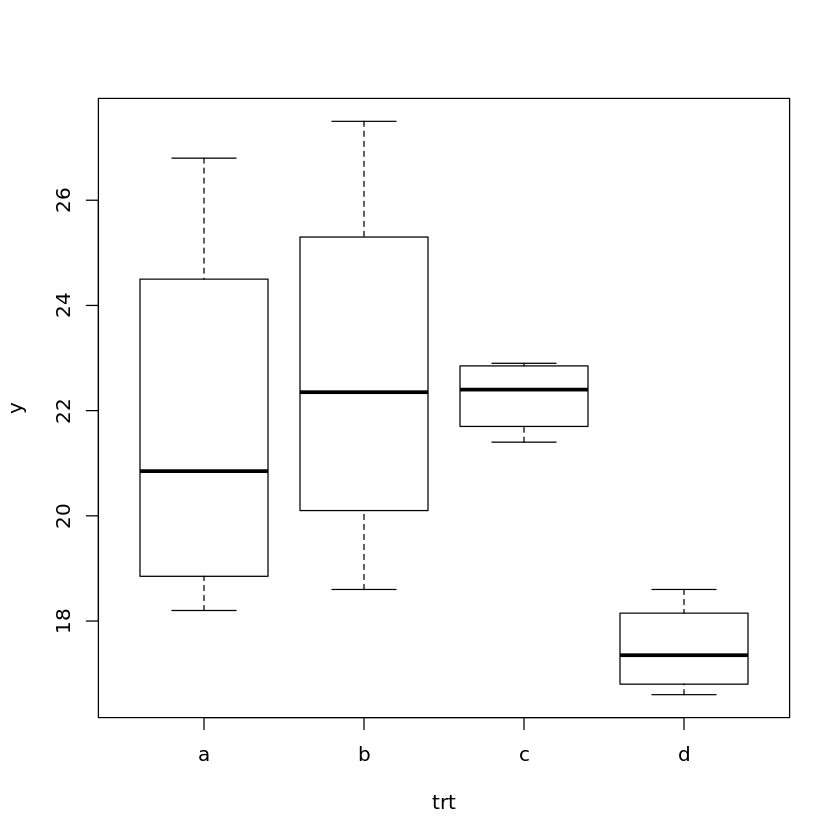

In [15]:
boxplot(y ~ trt, data = dados)

In [16]:
# Teste de normalidade
m <- lm(y ~ -1 + trt, data = dados)
res <- residuals(m)
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.90835, p-value = 0.1095


In [17]:
# Teste de homocedasticidade
bartlett.test(res ~ trt, data = dados)


	Bartlett test of homogeneity of variances

data:  res by trt
Bartlett's K-squared = 9.606, df = 3, p-value = 0.02223


In [18]:
# Construção de intervalos de 95% de confiança por bootstrap percentílico
pred <- fitted(m)
nboot <- 1000
pars <- matrix(nrow = nboot, ncol = length(coef(m)))
colnames(pars) <- names(coef(m))
for(i in 1:nboot) {
   obs <- pred + sample(res, rep = T)
   pars[i, ] <- coef(lm(obs ~ -1 + trt, data = dados))
}

# ICs bootstrap percentil 
apply(pars, 2, quantile, p = c(0.025, 0.975))

,trta,trtb,trtc,trtd
2.5%,19.61828,20.51750,20.19906,15.33672
97.5%,24.22000,25.14375,24.81875,20.04453


____
**Outros tipos de decomposição**

In [19]:
# SQ residuais dos modelos
deviance(lm(prod ~ 1, data = batata))         # modelo nulo (apenas com a constante mu)
deviance(lm(prod ~ bloco, data = batata))     # modelo com bloco apenas
deviance(lm(prod ~ cultivar, data = batata))  # modelo com cultivar apenas

[1] 5.4825

[1] 5.0175

[1] 1.1

In [20]:
# SQ de bloco e cultivar por redução da SQ residual (RSS)
add1(lm(prod ~ 1, data = batata), "bloco")
add1(lm(prod ~ 1, data = batata), "cultivar")

,Df,Sum of Sq,RSS,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5.4825,-7.400145
bloco,2,0.465,5.0175,-4.463698


,Df,Sum of Sq,RSS,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5.4825,-7.400145
cultivar,3,4.3825,1.1000,-20.675158


In [21]:
# verificando que as SQ não são afetadas pela ordem dos fatores em dados balanceados
anova(lm(prod ~ bloco + cultivar, data = batata))
anova(lm(prod ~ cultivar + bloco, data = batata))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bloco,2,0.4650,0.2325000,2.19685,0.19237256
cultivar,3,4.3825,1.4608333,13.80315,0.00421805
Residuals,6,0.6350,0.1058333,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cultivar,3,4.3825,1.4608333,13.80315,0.00421805
bloco,2,0.4650,0.2325000,2.19685,0.19237256
Residuals,6,0.6350,0.1058333,NA,NA


*Um exemplo de blocos aumentados (de Federer)*

In [22]:
# dados caupi (40 acessos + 4 variedades), em 4 blocos
caupi <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/caupi.csv", 
                  colClasses = c("factor", "factor", "numeric"))
str(caupi)

'data.frame':	56 obs. of  3 variables:
 $ genotipo: Factor w/ 44 levels "01","02","03",..: 41 42 43 44 1 2 3 4 5 6 ...
 $ bloco   : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ resp    : num  20 22.7 16 22.3 30.7 ...


In [25]:
# verificando o desbalanceamento (blocos incompletos)
xtabs( ~ bloco + genotipo, data = caupi, sparse = TRUE)

4 x 44 sparse Matrix of class "dgCMatrix"


   [[ suppressing 44 column names ‘01’, ‘02’, ‘03’ ... ]]



                                                                               
1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
2 . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . . . . .
3 . . . . . . . . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 . . . . . . . . .
4 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1
           
1 . 1 1 1 1
2 . 1 1 1 1
3 . 1 1 1 1
4 1 1 1 1 1


In [26]:
# ANOVAs com SQs tipo I (sequencial)
mod1.caupi <- lm(resp ~ bloco + genotipo, data = caupi)   # modelo 1 (bloco primeiro)
anova(mod1.caupi)
mod2.caupi <- lm(resp ~ genotipo + bloco, data = caupi)   # modelo 2 (genotipo primeiro)
anova(mod2.caupi)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bloco,3,148.29867,49.432890,11.95936,0.0017128868
genotipo,43,2177.50122,50.639563,12.25129,0.0002080085
Residuals,9,37.20066,4.133406,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
genotipo,43,2315.49337,53.848683,13.0276773,0.0001611241
bloco,3,10.30652,3.435506,0.8311562,0.5095706061
Residuals,9,37.20066,4.133406,NA,NA


In [30]:
# ANOVA com SQs tipo II (parcial)
library(car)
Anova(mod1.caupi, type = "II")

Loading required package: carData



,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
bloco,10.30652,3,0.8311562,0.5095706061
genotipo,2177.50122,43,12.2512911,0.0002080085
Residuals,37.20066,9,NA,NA


*As médias ajustadas*

In [33]:
library(emmeans)
lsmeans(mod1.caupi, specs = "genotipo")

 genotipo lsmean   SE df lower.CL upper.CL
 01         31.4 2.22  9    26.39     36.4
 02         17.4 2.22  9    12.34     22.4
 03         21.0 2.22  9    15.97     26.0
 04         47.3 2.22  9    42.32     52.3
 05         18.9 2.22  9    13.85     23.9
 06         18.4 2.22  9    13.37     23.4
 07         18.2 2.22  9    13.20     23.2
 08         16.9 2.22  9    11.89     21.9
 09         21.9 2.22  9    16.85     26.9
 10         16.6 2.22  9    11.54     21.6
 11         16.5 2.22  9    11.51     21.5
 12         44.6 2.22  9    39.60     49.6
 13         18.0 2.22  9    12.99     23.0
 14         15.0 2.22  9     9.95     20.0
 15         15.4 2.22  9    10.36     20.4
 16         17.4 2.22  9    12.40     22.4
 17         15.2 2.22  9    10.17     20.2
 18         23.4 2.22  9    18.42     28.4
 19         14.1 2.22  9     9.06     19.1
 20         18.1 2.22  9    13.05     23.1
 21         18.9 2.22  9    13.85     23.9
 22         18.5 2.22  9    13.51     23.5
 23        

In [34]:
# comparações de médias aos pares
pairs(lsmeans(mod1.caupi, specs = "genotipo"))[940:946]   # mostrando apenas as 7 últimas comparações

 contrast estimate   SE df t.ratio p.value
 40 - Z     -4.338 2.44  9 -1.780  0.5887 
 W - X      -2.127 1.44  9 -1.480  0.7501 
 W - Y      -0.260 1.44  9 -0.181  1.0000 
 W - Z      -1.960 1.44  9 -1.363  0.8077 
 X - Y       1.867 1.44  9  1.299  0.8371 
 X - Z       0.168 1.44  9  0.117  1.0000 
 Y - Z      -1.700 1.44  9 -1.183  0.8846 

Results are averaged over the levels of: bloco 
P value adjustment: tukey method for comparing a family of 7 estimates 